In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
PLOTS_DIR = 'plots/'

In [2]:
df = pd.read_csv('data/apple_mobility.csv',parse_dates=True)
df['date'] = [datetime.strptime(x, "%d/%m/%Y") for x in df['date']]
hw_df = pd.read_csv('data/activity_homeworking.csv')
hw_df['date'] = [datetime.strptime(x, "%Y-%m-%d") for x in hw_df['date']]
case_df = pd.read_csv('data/data_2021-Mar-16.csv', parse_dates=False)
case_df['date'] = [datetime.strptime(x, "%d/%m/%Y") for x in case_df['date']]

In [3]:
holiday_data = pd.read_csv('data/bankholiday(2017-2021).csv', parse_dates=True)
hdays = pd.concat([holiday_data['2020'], holiday_data['2021']])
hdays = [datetime.strptime(x, "%Y-%m-%d") for x in hdays]

In [4]:
def filter_data(df):
    df['day_of_week'] = df['date'].dt.dayofweek
    df['weekday'] = ~df['day_of_week'].isin([5, 6])
    df['weekend'] = df['day_of_week'].isin([5, 6])
    df['holiday'] = df['date'].isin(hdays)
    df = df.replace({True: 1, False: 0})
    return df

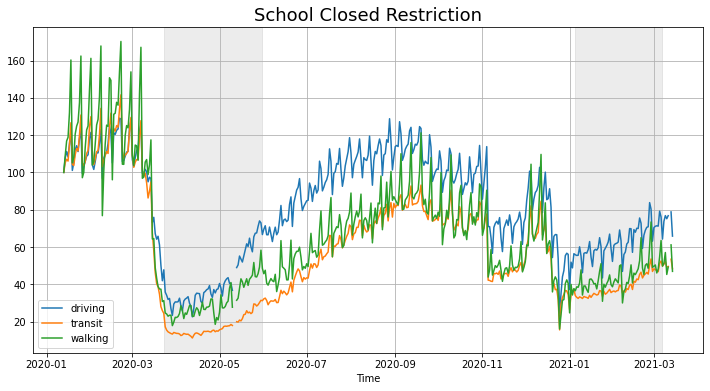

In [5]:
#visualize school_closed restriction 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'], df['driving'], label='driving')
ax.plot(df['date'], df['transit'], label='transit')
ax.plot(df['date'], df['walking'], label='walking')
ax.set_xlabel('Time')
ax.axvspan(date2num(datetime(2020,3,23)), date2num(datetime(2020,5,31)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2021,1,5)), date2num(datetime(2021,3,7)), color="grey", alpha=0.15)
ax.set_title('School Closed Restriction', size=18)
ax.grid(True)
ax.legend(loc='best')
plt.savefig(PLOTS_DIR + 'school_closed_restriction' + '.png')
plt.show()
plt.close()

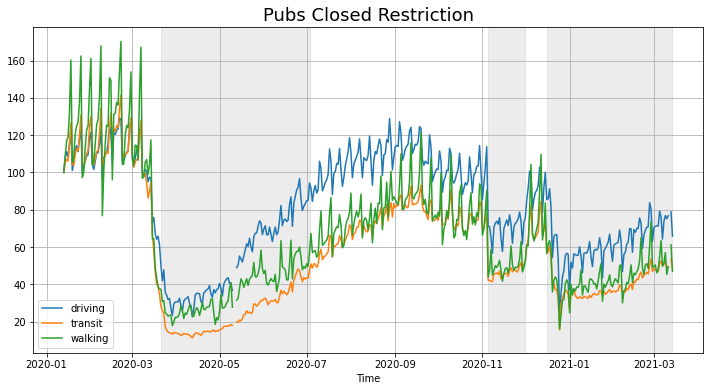

In [6]:
#visualize pub_closed restriction
#df = get_day_of_week(df).loc[df['weekend'] == 1]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'], df['driving'], label='driving')
ax.plot(df['date'], df['transit'], label='transit')
ax.plot(df['date'], df['walking'], label='walking')
ax.set_xlabel('Time')
ax.axvspan(date2num(datetime(2020,3,21)), date2num(datetime(2020,7,3)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,12,16)), date2num(datetime(2021,3,14)), color="grey", alpha=0.15)
ax.set_title('Pubs Closed Restriction', size=18)
ax.grid(True)
ax.legend(loc='best')
plt.savefig(PLOTS_DIR + 'pub_restriction' + '.png')
plt.show()
plt.close()

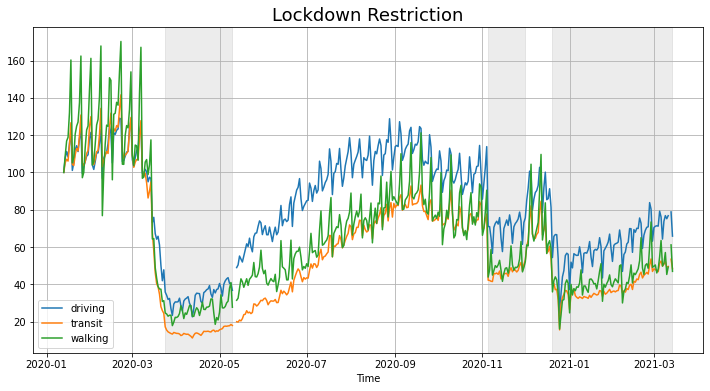

In [7]:
#visualize lockdown restriction
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'], df['driving'], label='driving')
ax.plot(df['date'], df['transit'], label='transit')
ax.plot(df['date'], df['walking'], label='walking')
ax.set_xlabel('Time')
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,10)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,12,20)), date2num(datetime(2021,3,14)), color="grey", alpha=0.15)
ax.set_title('Lockdown Restriction', size=18)
ax.grid(True)
ax.legend(loc='best')
plt.savefig(PLOTS_DIR + 'lockdown' + '.png')
plt.show()
plt.close()

In [8]:
#filter working from home data
hw_df = filter_data(hw_df)
hw1_df = hw_df.loc[(hw_df['activity'] == 'Residential') & (
        hw_df['weekday'] == 1) & (hw_df['holiday'] == 0)].drop(columns=['location','source'])
hw0_df = hw_df.loc[(hw_df['activity'] == 'Workplaces') & (
        hw_df['weekday'] == 1) & (hw_df['holiday'] == 0)].drop(columns=['location','source'])

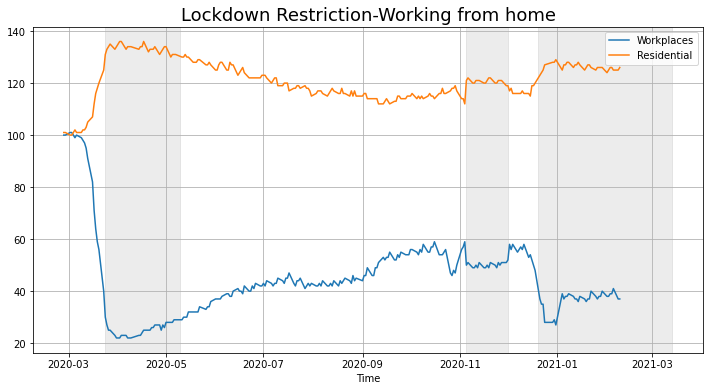

In [9]:
#visualize working from home data 
#removed weekends and bank holidays
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hw0_df['date'], hw0_df['value'], label='Workplaces')
ax.plot(hw1_df['date'], hw1_df['value'], label='Residential')
ax.set_xlabel('Time')
ax.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,10)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)), color="grey", alpha=0.15)
ax.axvspan(date2num(datetime(2020,12,20)), date2num(datetime(2021,3,14)), color="grey", alpha=0.15)
ax.set_title('Lockdown Restriction-Working from home', size=18)
ax.grid(True)
ax.legend(loc='upper right')
plt.savefig(PLOTS_DIR + 'work_from_home' + '.png')
plt.show()
plt.close()

In [10]:
#filter covid-19 cases data
case_df = case_df.loc[case_df['date'].isin(df['date'])].drop(columns=['areaType','areaName','areaCode'])
df_new = pd.merge(df, case_df, on='date')

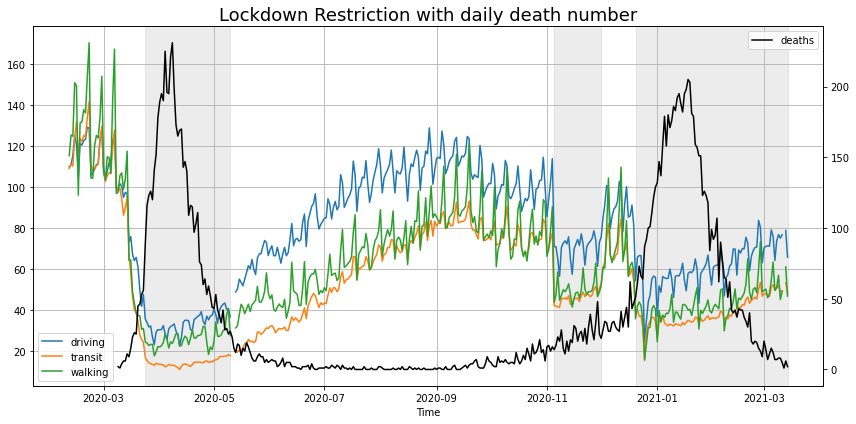

In [11]:
#visualize death number
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_new['date'], df_new['driving'], label='driving')
ax1.plot(df_new['date'], df_new['transit'], label='transit')
ax1.plot(df_new['date'], df_new['walking'], label='walking')
ax1.set_xlabel('Time')
ax1.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,10)), color="grey", alpha=0.15)
ax1.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)), color="grey", alpha=0.15)
ax1.axvspan(date2num(datetime(2020,12,20)), date2num(datetime(2021,3,14)), color="grey", alpha=0.15)
ax1.set_title('Lockdown Restriction with daily death number', size=18)
ax1.grid(True)
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(df_new['date'], df_new['newDeaths28DaysByDeathDate'], label='deaths', color='black')
ax2.legend(loc='best')
fig.tight_layout()
plt.savefig(PLOTS_DIR + 'covid-19 deaths' + '.png')
plt.show()
plt.close()

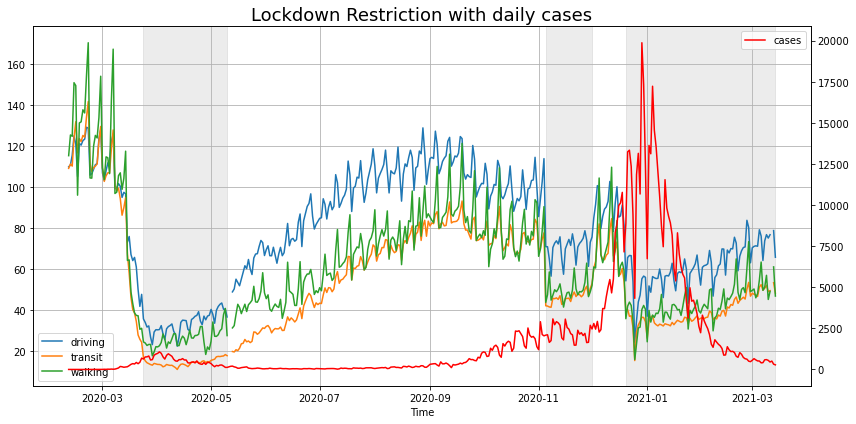

In [12]:
#visualize case number
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_new['date'], df_new['driving'], label='driving')
ax1.plot(df_new['date'], df_new['transit'], label='transit')
ax1.plot(df_new['date'], df_new['walking'], label='walking')
ax1.set_xlabel('Time')
ax1.axvspan(date2num(datetime(2020,3,24)), date2num(datetime(2020,5,10)), color="grey", alpha=0.15)
ax1.axvspan(date2num(datetime(2020,11,5)), date2num(datetime(2020,12,1)), color="grey", alpha=0.15)
ax1.axvspan(date2num(datetime(2020,12,20)), date2num(datetime(2021,3,14)), color="grey", alpha=0.15)
ax1.set_title('Lockdown Restriction with daily cases', size=18)
ax1.grid(True)
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(df_new['date'], df_new['newCasesBySpecimenDate'], label='cases', color='red')
ax2.legend(loc='best')
fig.tight_layout()
plt.savefig(PLOTS_DIR + 'covid-19 cases' + '.png')
plt.show()
plt.close()

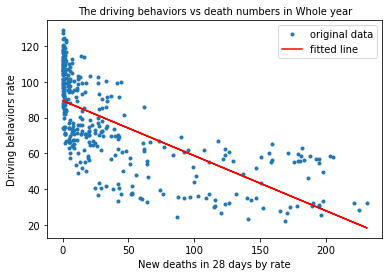

y = -0.308 x + 89.498
Rsq =  0.4762813310060392
p-value =  2.369338136368651e-53


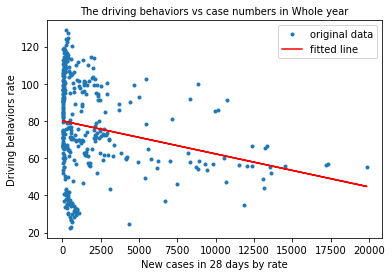

y = -0.002 x + 80.087
Rsq =  0.050705331902289465
p-value =  1.294031167729104e-05


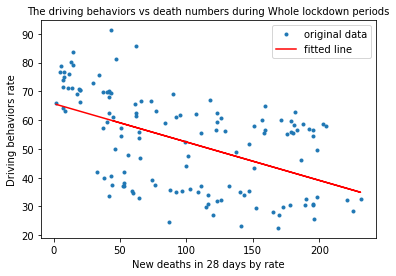

y = -0.133 x + 65.743
Rsq =  0.2675626290825324
p-value =  1.5613681618865308e-10


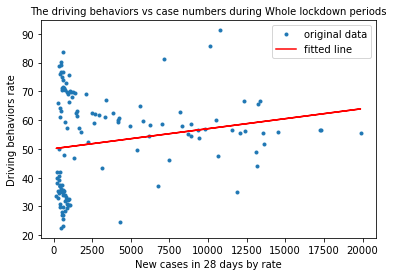

y = 0.001 x + 50.072
Rsq =  0.03843173952567145
p-value =  0.02319890085680655


In [62]:
# This is a regression analysis about death&case numbers vs driving behaviors
df_new.drop(df_new[((df_new.newDeaths28DaysByDeathDate.isna()))].index, axis=0, inplace=True)
df_new.drop(df_new[((df_new.driving.isna()))].index, axis=0, inplace=True)
df_restrict=df_new.copy()
df_restrict.drop(df_restrict.index[0:11], inplace=True)
df_restrict.drop(df_restrict.index[47:270], inplace=True)
# whole year
# death vs driving
import scipy.stats as sps
from scipy.stats import expon
X = df_new['newDeaths28DaysByDeathDate']
Y = df_new['driving']

plt.xlabel('New deaths in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.title('The driving behaviors vs death numbers in Whole year',fontsize=10)
plt.legend()
plt.show()
print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

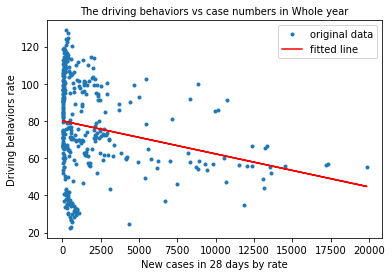

y = -0.002 x + 80.087
Rsq =  0.050705331902289465
p-value =  1.294031167729104e-05


In [68]:
# case vs driving
X = df_new['newCasesBySpecimenDate']
Y = df_new['driving']

plt.xlabel('New cases in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.title('The driving behaviors vs case numbers in Whole year',fontsize=10)
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)


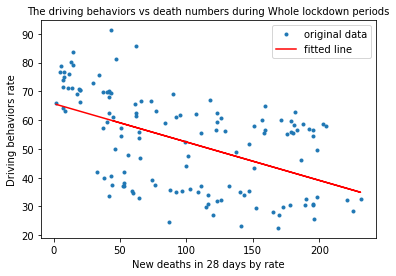

y = -0.133 x + 65.743
Rsq =  0.2675626290825324
p-value =  1.5613681618865308e-10


In [69]:
#Whole lockdown periods
# death vs driving
X = df_restrict['newDeaths28DaysByDeathDate']
Y = df_restrict['driving']

plt.xlabel('New deaths in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.title('The driving behaviors vs death numbers during Whole lockdown periods',fontsize=10)
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)


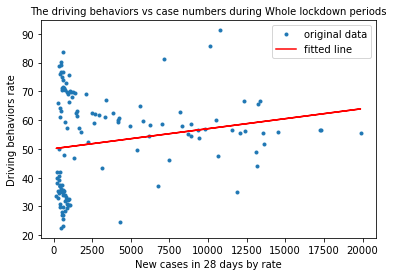

y = 0.001 x + 50.072
Rsq =  0.03843173952567145
p-value =  0.02319890085680655


In [70]:
# case vs driving
X = df_restrict['newCasesBySpecimenDate']
Y = df_restrict['driving']

plt.xlabel('New cases in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.legend()
plt.title('The driving behaviors vs case numbers during Whole lockdown periods',fontsize=10)
plt.show()
print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

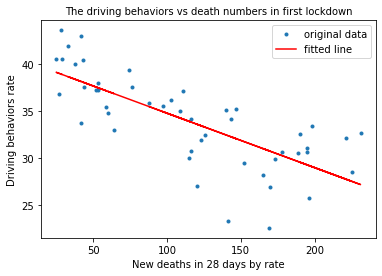

y = -0.058 x + 40.536
Rsq =  0.5495591244818409
p-value =  1.677751001439789e-09


In [71]:
df1=df_new.iloc[15:63]
df2=df_new.iloc[284:370]

#First lockdown
# death vs driving
X = df1['newDeaths28DaysByDeathDate']
Y = df1['driving']

plt.xlabel('New deaths in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.legend()
plt.title('The driving behaviors vs death numbers in first lockdown',fontsize=10)
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)


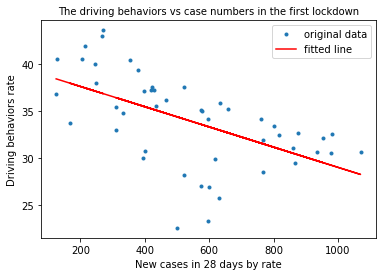

y = -0.011 x + 39.735
Rsq =  0.30996831375263045
p-value =  3.9650377237879153e-05


In [72]:
# case vs driving
X = df1['newCasesBySpecimenDate']
Y = df1['driving']

plt.xlabel('New cases in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.legend()
plt.title('The driving behaviors vs case numbers in the first lockdown',fontsize=10)
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

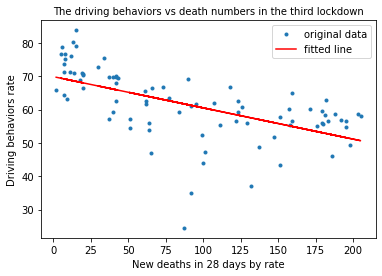

y = -0.094 x + 69.886
Rsq =  0.34251421834066564
p-value =  5.015172796287578e-09


In [73]:
#Third lockdown
#death vs driving
X = df2['newDeaths28DaysByDeathDate']
Y = df2['driving']

plt.xlabel('New deaths in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.legend()
plt.title('The driving behaviors vs death numbers in the third lockdown',fontsize=10)
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

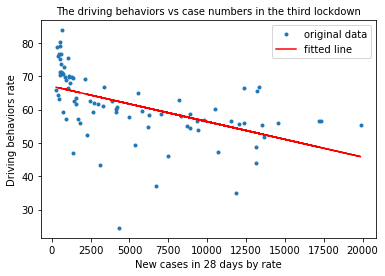

y = -0.001 x + 67.002
Rsq =  0.2682642978936348
p-value =  4.5167050762670364e-07


In [74]:
# case vs driving
X = df2['newCasesBySpecimenDate']
Y = df2['driving']

plt.xlabel('New cases in 28 days by rate')
plt.ylabel('Driving behaviors rate')

a = plt.plot(X,Y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.
plt.legend()
plt.title('The driving behaviors vs case numbers in the third lockdown',fontsize=10)
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)